In [10]:
import modbampy
from modbampy import ModBam
path = './data/prom_R10.4.1_E8.2_WGS_brain_DMR_regions.bam'

In [44]:
with ModBam('./data/prom_R10.4.1_E8.2_WGS_brain_DMR_regions.bam') as bam: 
    for read in bam.reads("chr11", 11975124, 11977097):
        for pos_mod in read.mod_sites:
            print(*pos_mod)

ffcc8b4d-1d1e-4c5d-9af2-25166c1af2e3 -1 3 - 0 C h 3
ffcc8b4d-1d1e-4c5d-9af2-25166c1af2e3 -1 3 - 0 C m 0
ffcc8b4d-1d1e-4c5d-9af2-25166c1af2e3 -1 404 - 0 C h 3
ffcc8b4d-1d1e-4c5d-9af2-25166c1af2e3 -1 404 - 0 C m 0
ffcc8b4d-1d1e-4c5d-9af2-25166c1af2e3 11965813 631 - 0 C h 107
ffcc8b4d-1d1e-4c5d-9af2-25166c1af2e3 11965813 631 - 0 C m 147
ffcc8b4d-1d1e-4c5d-9af2-25166c1af2e3 11965841 658 - 0 C h 160
ffcc8b4d-1d1e-4c5d-9af2-25166c1af2e3 11965841 658 - 0 C m 95
ffcc8b4d-1d1e-4c5d-9af2-25166c1af2e3 11966030 846 - 0 C h 2
ffcc8b4d-1d1e-4c5d-9af2-25166c1af2e3 11966030 846 - 0 C m 253
ffcc8b4d-1d1e-4c5d-9af2-25166c1af2e3 11966169 986 - 0 C h 2
ffcc8b4d-1d1e-4c5d-9af2-25166c1af2e3 11966169 986 - 0 C m 0
ffcc8b4d-1d1e-4c5d-9af2-25166c1af2e3 11966337 1155 - 0 C h 1
ffcc8b4d-1d1e-4c5d-9af2-25166c1af2e3 11966337 1155 - 0 C m 0
ffcc8b4d-1d1e-4c5d-9af2-25166c1af2e3 11966626 1438 - 0 C h 4
ffcc8b4d-1d1e-4c5d-9af2-25166c1af2e3 11966626 1438 - 0 C m 250
ffcc8b4d-1d1e-4c5d-9af2-25166c1af2e3 11966709 1520 - 

In [80]:
import pandas as pd

def retrievePositionsDF(path):
    names=["chromosome", "chromStart", "chromEnd", "geneName", "POO"]
    positions_df = pd.read_csv(path, names=names, sep="\t")
    return positions_df


In [101]:
dmr_coords_path = './feature_references/fig6_features/mm39_dmr_coordinates.bed'


In [98]:
def retrievePositionsFromDF(df):
    dict_of_coordinates = {}
    for line, value in df.iterrows():
        index = value[3]
        sub_dict = {
            "chromosome" : value[0],
            "chromStart" : value[1],
            "chromEnd" : value[2]
        }
        coord_dict = {index : sub_dict}
        dict_of_coordinates.update(coord_dict)
    return dict_of_coordinates

coord_dict = retrievePositionsFromDF(retrievePositionsDF(dmr_coords_path))

In [66]:
with ModBam('./data/prom_R10.4.1_E8.2_WGS_brain_DMR_regions.bam') as bam: 
    mod_data_list = []
    for read in bam.reads("chr11", 11975124, 11977097):
        for pos_mod in read.mod_sites:
            data_list = []
            for datum in pos_mod[0:8]:
                data_list.append(datum)
            mod_data_list.append(data_list)

In [234]:
with ModBam('./data/prom_R10.4.1_E8.2_WGS_brain_DMR_regions.bam') as bam: 
    for gene in coord_dict.values():
        gene_mod_data_list = []
        for read in bam.reads(gene["chromosome"], gene["chromStart"], gene["chromEnd"]):
            read_mod_sites = []
            for modified_base_position in read.mod_sites:
                modified_base_list = []
                modified_base_list.append(gene["chromosome"])
                modified_base_list.append(gene["chromStart"])
                modified_base_list.append(gene["chromEnd"])
                for item in modified_base_position[0:8]:
                    modified_base_list.append(item)
                read_mod_sites.append(modified_base_list)
            gene_mod_data_list.append(read_mod_sites)

In [235]:
df_list = []
names=["chromosome", "chromStart", "chromEnd", "read", "refPos", "qPos", "refStrand", "modStrand", "base", "mod", "score"]
for df in gene_mod_data_list:
    df_list.append(pd.DataFrame(df, columns=names))
all_imprinted_genes = pd.concat(df_list)

In [236]:
all_imprinted_genes

,chromosome,chromStart,chromEnd,read,refPos,qPos,refStrand,modStrand,base,mod,score
0,chr18,13104983,13108058,2207c512-2b8d-4646-83bd-d9aa2ff94b27,-1,2,-,0,C,h,15
1,chr18,13104983,13108058,2207c512-2b8d-4646-83bd-d9aa2ff94b27,-1,2,-,0,C,m,239
2,chr18,13104983,13108058,2207c512-2b8d-4646-83bd-d9aa2ff94b27,-1,11,-,0,C,h,96
3,chr18,13104983,13108058,2207c512-2b8d-4646-83bd-d9aa2ff94b27,-1,11,-,0,C,m,147
4,chr18,13104983,13108058,2207c512-2b8d-4646-83bd-d9aa2ff94b27,13100731,125,-,0,C,h,0
...,...,...,...,...,...,...,...,...,...,...,...
77,chr18,13104983,13108058,38e3ddc2-ff4d-4e8c-8767-ef0dc01c0332,13112767,4874,-,0,C,m,0
78,chr18,13104983,13108058,38e3ddc2-ff4d-4e8c-8767-ef0dc01c0332,-1,4886,-,0,C,h,8
79,chr18,13104983,13108058,38e3ddc2-ff4d-4e8c-8767-ef0dc01c0332,-1,4886,-,0,C,m,0
80,chr18,13104983,13108058,38e3ddc2-ff4d-4e8c-8767-ef0dc01c0332,-1,4896,-,0,C,h,186


In [173]:
import pandas as pd
names=["read", "refPos", "qPos", "refStrand", "modStrand", "base", "mod", "score"]
site_read_df = pd.DataFrame(mod_data_list, columns=names)
site_read_filt_df = site_read_df.loc[(site_read_df["refPos"] > 11975124) & (site_read_df["refPos"] < 11977097) & (site_read_df["score"] > (0.66)*(255))] 

In [227]:
site_read_df.groupby(["read", "refPos"])["score"].sum().reset_index()

,read,refPos,score
0,015768c1-1c55-4c69-aeab-584985c51187,-1,86
1,015768c1-1c55-4c69-aeab-584985c51187,11972410,255
2,015768c1-1c55-4c69-aeab-584985c51187,11972545,255
3,015768c1-1c55-4c69-aeab-584985c51187,11972989,255
4,015768c1-1c55-4c69-aeab-584985c51187,11973119,8
...,...,...,...
8315,ffcc8b4d-1d1e-4c5d-9af2-25166c1af2e3,11976261,5
8316,ffcc8b4d-1d1e-4c5d-9af2-25166c1af2e3,11976263,4
8317,ffcc8b4d-1d1e-4c5d-9af2-25166c1af2e3,11976276,6
8318,ffcc8b4d-1d1e-4c5d-9af2-25166c1af2e3,11976281,4


In [174]:
grb10_eg_df = site_read_filt_df.groupby(["read", "mod"], as_index=False)["refPos"].count()

In [203]:
heatmap = grb10_eg_df.pivot(index="read", columns=["mod"], values="refPos").fillna(0)

In [211]:
heatmap[["m", "h"]]

mod,m,h
read,,
0877f122-ad74-4614-a710-04e9c109a3f2,0.0,1.0
11d113f0-c179-4f4e-938f-b7af31514c8c,137.0,15.0
129f3234-a07e-4968-97e1-da4a8ad58b40,139.0,10.0
1388c044-945d-44af-9503-d2b6242445c8,0.0,1.0
15ff802c-6e45-4242-b009-82572dc015a5,140.0,6.0
1bb1ff9f-ccac-4b41-acbb-6309a639e96e,1.0,0.0
23656b16-17cd-4460-85be-b5ad1ea813bd,1.0,0.0
2699e361-82f6-44b7-a43d-ad2a88f28b80,1.0,4.0
27841fa5-0e63-417b-b2e5-8575f0031c7e,2.0,2.0


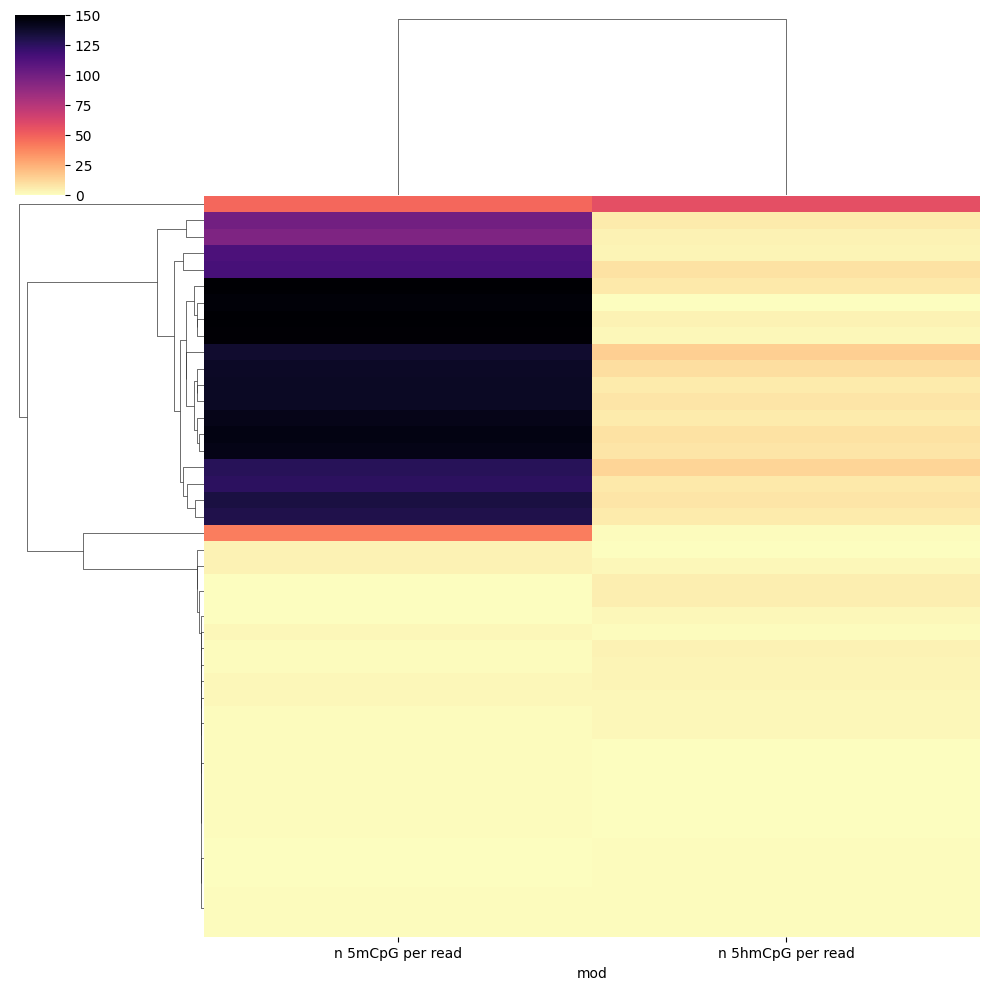

In [237]:
import seaborn as sns
sns.clustermap(heatmap.reset_index()[["m", "h"]], figsize=(10, 10), method="single", cmap="magma_r", yticklabels=False, xticklabels=["n 5mCpG per read", "n 5hmCpG per read"])